### Topic for today
* Why Visualization
* Bar charts
* Scatter plots

<hr>

### Why Visualization
* Visual memory is more stronger.
* Any information is you are showing visually, retaintion is higher

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

#showing the graphs & charts in jupyter-notebook
%matplotlib inline

/home/awantik/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [4]:
hr_data = hr_df = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/HR_comma_sep.csv.txt')

In [6]:
hr_data.rename(columns={'sales':'dept'}, inplace=True)

### Plotting department wise distribution

In [9]:
res = hr_data.dept.value_counts()

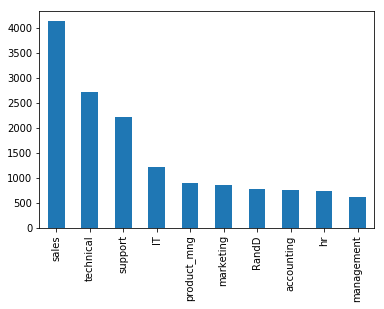

In [10]:
res.plot.bar()

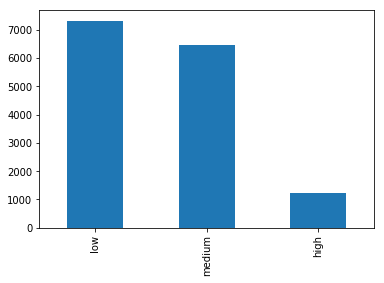

In [12]:
hr_data.salary.value_counts().plot.bar()

## These are bar charts
* To plot frequency of a categorical column use bar chart
* If data is series, bar chart is of one layer

In [13]:
# Give a hike to people working more than 4 projects

In [15]:
hr_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')

In [16]:
def f(r):
    if r.number_project > 4:
        if r.salary == 'medium':
            return 'high'
        elif r.salary == 'low':
            return 'medium'
        else:
            return 'high'
    else:
        return r.salary
hr_data['new_salary'] = hr_data.apply(f,axis=1)

In [19]:
new_salary = hr_data.new_salary.value_counts()

In [20]:
old_salary = hr_data.salary.value_counts()

In [23]:
salary_comp = pd.DataFrame({'Old Salary':old_salary, 'New Salary':new_salary})

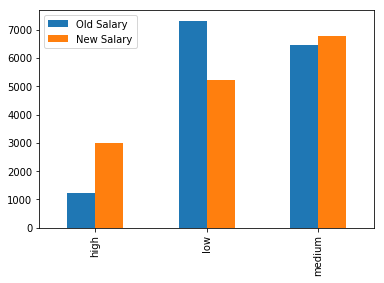

In [25]:
salary_comp.plot.bar()

In [26]:
cols = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship'
        ,'race','sex','capital-gain','capital-loss','hours-per-week','native-country','Salary']

adult_data = pd.read_csv('https://raw.githubusercontent.com/zekelabs/data-science-complete-tutorial/master/Data/adult.data.txt', names=cols)

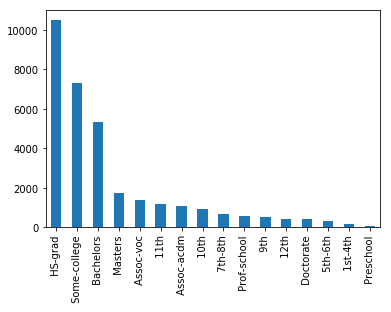

In [28]:
adult_data.education.value_counts().plot.bar()

### ScatterPlot
* Understand trend/relationship between continues data

Text(0, 0.5, 'avg monthly hrs')

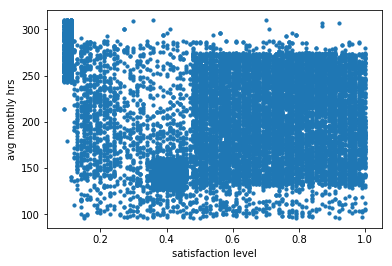

In [31]:
plt.scatter(x=hr_data.satisfaction_level, y=hr_data.average_montly_hours,s=10)
plt.xlabel('satisfaction level')
plt.ylabel('avg monthly hrs')

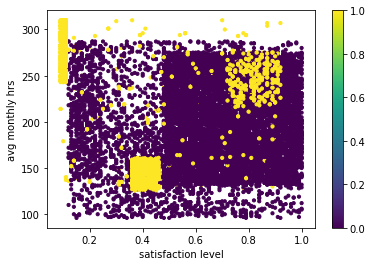

In [34]:
plt.scatter(x=hr_data.satisfaction_level, y=hr_data.average_montly_hours,s=10,c=hr_data.left)
plt.xlabel('satisfaction level')
plt.ylabel('avg monthly hrs')
plt.colorbar()

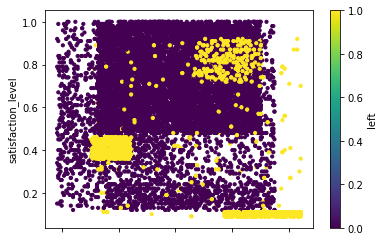

In [42]:
hr_data.plot.scatter(x='average_montly_hours',y='satisfaction_level',s=10,c='left',cmap='viridis')

In [43]:
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Questions on plotting
* Plot the relationship between education-num & hours-per-week
* Plot the relationship between education-num & hours-per-week & gender

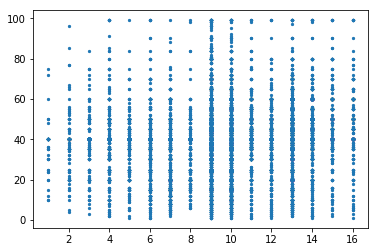

In [56]:
plt.scatter(x=adult_data['education-num'],y=adult_data['hours-per-week'],s=5)

In [55]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
Salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [57]:
adult_data['sex'] = adult_data.sex.str.strip()

In [60]:
adult_data['sex_num'] = adult_data.sex.map(lambda x: 1 if x == 'Male' else 0)

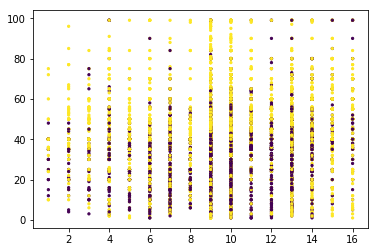

In [62]:
plt.scatter(x=adult_data['education-num'],y=adult_data['hours-per-week'],s=5, c=adult_data.sex_num)

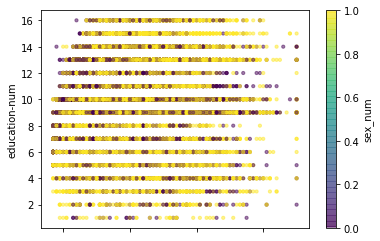

In [67]:
adult_data.plot.scatter(x='age',y='education-num',c='sex_num',s=10, cmap='viridis',alpha=.5)

### Pie charts
* Small Distribution information 

([<matplotlib.patches.Wedge at 0x7fb67dbf4198>,
 [Text(0.04226778373338524, 1.0991876247748915, 'low'),
  Text(-0.32247422223497674, -1.051670279124568, 'medium'),
  Text(1.06328474507822, -0.28182539077227425, 'high')],
 [Text(0.02305515476366467, 0.5995568862408499, '48.78'),
  Text(-0.1758950303099873, -0.5736383340679462, '42.98'),
  Text(0.5799734973153926, -0.1537229404212405, '8.25')])

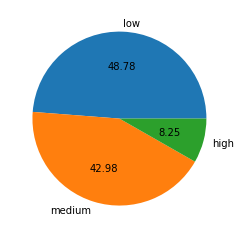

In [78]:
plt.pie(x=old_salary, labels= old_salary.index, autopct= '%.2f')

In [81]:
edu_dist = adult_data.education.value_counts()

([<matplotlib.patches.Wedge at 0x7fb67dc21898>,
 [Text(0.5820899380125792, 0.9333655790013428, ' HS-grad'),
  Text(-1.0080460983118946, 0.44027612208495526, ' Some-college'),
  Text(-0.7597721283465596, -0.7954535266046276, ' Bachelors'),
  Text(-0.08741327393996691, -1.096521280933068, ' Masters'),
  Text(0.24008494758967386, -1.0734799569348576, ' Assoc-voc'),
  Text(0.4949730840386798, -0.9823449730503222, ' 11th'),
  Text(0.694280840521506, -0.8532139910273104, ' Assoc-acdm'),
  Text(0.8450166685674572, -0.704234925179912, ' 10th'),
  Text(0.942102978552347, -0.5678397465859502, ' 7th-8th'),
  Text(1.0023572365721214, -0.45307832688344374, ' Prof-school'),
  Text(1.0443802910268456, -0.3453546115439627, ' 9th'),
  Text(1.0715349148116406, -0.2486220552155627, ' 12th'),
  Text(1.0882384969803631, -0.16042747174321548, ' Doctorate'),
  Text(1.0969578840449365, -0.0817520680573624, ' 5th-6th'),
  Text(1.099626774868771, -0.02865232960346699, ' 1st-4th'),
  Text(1.0999866828441163, -0.

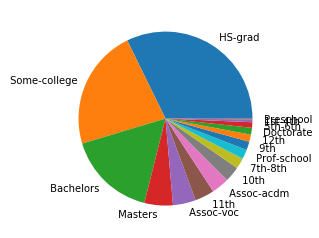

In [82]:
plt.pie(x=edu_dist, labels=edu_dist.index)